# Forest Cover Type Prediction
### 1. EDA and feature engineering
![forest-cover-type-coverimage](https://kaggle2.blob.core.windows.net/competitions/kaggle/3936/logos/front_page.png)
<center>https://www.kaggle.com/c/forest-cover-type-prediction</center>


In [127]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Features
* Elevation - Elevation in meters, 해발 고도
* Aspect - Aspect in degrees azimuth, 자침(나침반) 각도 [0-360]
* Slope - Slope in degrees, 경사 각도 [0-360]
<br><br>
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
<br><br>
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
<br><br>
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
<br><br>
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
<br><br>
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [128]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [129]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [130]:
for col in train_df.columns:
    print(col, len(train_df[col].unique()))

Id 15120
Elevation 1665
Aspect 361
Slope 52
Horizontal_Distance_To_Hydrology 400
Vertical_Distance_To_Hydrology 423
Horizontal_Distance_To_Roadways 3250
Hillshade_9am 176
Hillshade_Noon 141
Hillshade_3pm 247
Horizontal_Distance_To_Fire_Points 2710
Wilderness_Area1 2
Wilderness_Area2 2
Wilderness_Area3 2
Wilderness_Area4 2
Soil_Type1 2
Soil_Type2 2
Soil_Type3 2
Soil_Type4 2
Soil_Type5 2
Soil_Type6 2
Soil_Type7 1
Soil_Type8 2
Soil_Type9 2
Soil_Type10 2
Soil_Type11 2
Soil_Type12 2
Soil_Type13 2
Soil_Type14 2
Soil_Type15 1
Soil_Type16 2
Soil_Type17 2
Soil_Type18 2
Soil_Type19 2
Soil_Type20 2
Soil_Type21 2
Soil_Type22 2
Soil_Type23 2
Soil_Type24 2
Soil_Type25 2
Soil_Type26 2
Soil_Type27 2
Soil_Type28 2
Soil_Type29 2
Soil_Type30 2
Soil_Type31 2
Soil_Type32 2
Soil_Type33 2
Soil_Type34 2
Soil_Type35 2
Soil_Type36 2
Soil_Type37 2
Soil_Type38 2
Soil_Type39 2
Soil_Type40 2
Cover_Type 7


In [131]:
# number of nulls for each column
train_df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [132]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [133]:
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [134]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
Id                                    565892 non-null int64
Elevation                             565892 non-null int64
Aspect                                565892 non-null int64
Slope                                 565892 non-null int64
Horizontal_Distance_To_Hydrology      565892 non-null int64
Vertical_Distance_To_Hydrology        565892 non-null int64
Horizontal_Distance_To_Roadways       565892 non-null int64
Hillshade_9am                         565892 non-null int64
Hillshade_Noon                        565892 non-null int64
Hillshade_3pm                         565892 non-null int64
Horizontal_Distance_To_Fire_Points    565892 non-null int64
Wilderness_Area1                      565892 non-null int64
Wilderness_Area2                      565892 non-null int64
Wilderness_Area3                      565892 non-null int64
Wilderness_Area4                      565892 non-

### 55 feature columns + 1 target column
### samples in test set > 30 * samples in train set

In [135]:
print(train_df.shape)
print(test_df.shape)

(15120, 56)
(565892, 55)


### datatype of all columns = `integer`

In [136]:
print(len(train_df.select_dtypes(include=['object']).columns))
print(len(train_df.select_dtypes(exclude=['object']).columns))

0
56


### Cover_Type (Target Feature, 7 classes)
* balanced data (equivalent number of samples for each label)

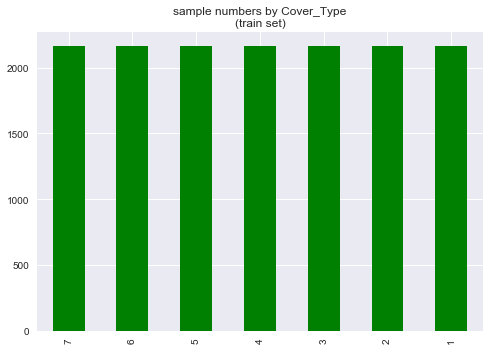

In [137]:
train_df.Cover_Type.value_counts().plot(kind='bar', color='g'); plt.title('sample numbers by Cover_Type\n(train set)'); plt.show()

# Feature categorization
[Continuous]
* 'Elevation'
* 'Horizontal_Distance_To_Hydrology'
* 'Vertical_Distance_To_Hydrology'
* 'Horizontal_Distance_To_Roadways'
* 'Horizontal_Distance_To_Fire_Points'

<br>
[Categorical]
* 'Aspect', 'Slope'
  * [0-360] index
* 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'
  * [0-255] index
* Wilderness_{1-4}
  * 1 - Rawah Wilderness Area
  * 2 - Neota Wilderness Area
  * 3 - Comanche Peak Wilderness Area
  * 4 - Cache la Poudre Wilderness Area
* Soil_Type{1-40}

<br>
[Target feature]
* 'Cover_Type'
  * 1 - Spruce/Fir
  * 2 - Lodgepole Pine
  * 3 - Ponderosa Pine
  * 4 - Cottonwood/Willow
  * 5 - Aspen
  * 6 - Douglas-fir
  * 7 - Krummholz

In [138]:
major_features = ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',\
                         'Horizontal_Distance_To_Fire_Points', 'Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

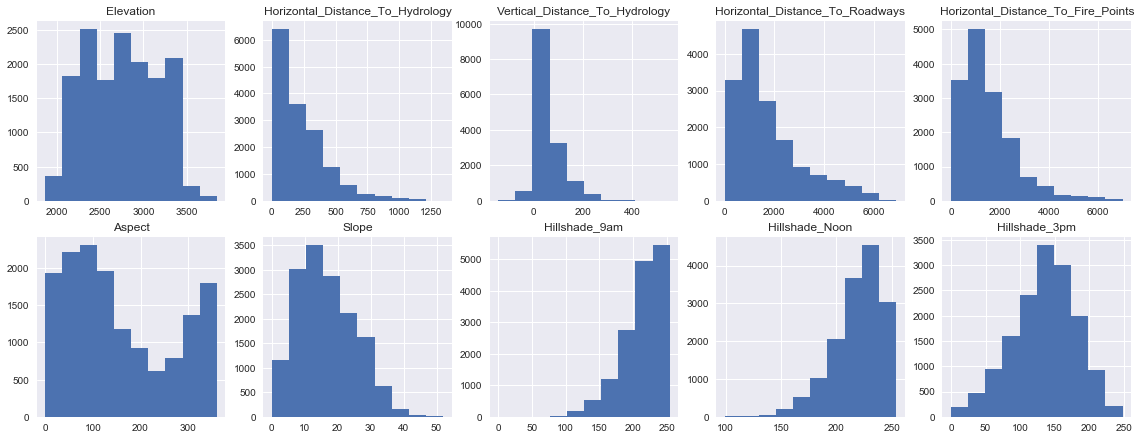

In [139]:
f, atrain_dfarr = plt.subplots(2, 5)

for i, col in enumerate(major_features):
    
    if i < 5:
        atrain_dfarr[0, i].hist(train_df[col])
        atrain_dfarr[0, i].set_title(col)
        
    else:
        atrain_dfarr[1, i-5].hist(train_df[col])
        atrain_dfarr[1, i-5].set_title(col)

# Fine-tune figure; hide train_df ticks for top plots and y ticks for right plots
#plt.setp([a.get_train_dfticklabels() for a in atrain_dfarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in atrain_dfarr[:, 1]], visible=False)
#plt.figure(figsize=(100,100))
plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
plt.show()

## Overall characteristics of forests(labels) using groupby


* Some background information for these four wilderness areas: 

  * Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value. 
  * As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4). 
  * The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

In [140]:
# Wilderness_Area areas - elevation
for wilderness in ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']:
    print(wilderness, '- mean elevation:', train_df.groupby(wilderness)['Elevation'].mean()[1])

Wilderness_Area1 - mean elevation: 2996.32527106
Wilderness_Area2 - mean elevation: 3341.04408818
Wilderness_Area3 - mean elevation: 2923.11608127
Wilderness_Area4 - mean elevation: 2260.09197861


CoverType1 - mean elevation: 3128.025925925926 / std: 156.12498785692443


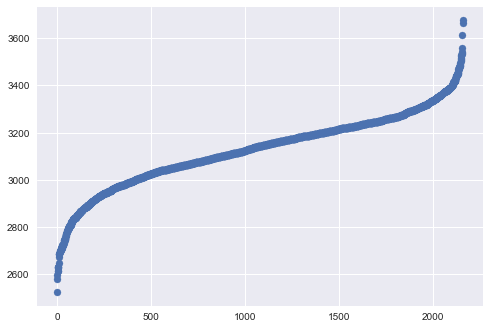

CoverType2 - mean elevation: 2922.5402777777776 / std: 185.77826795108646


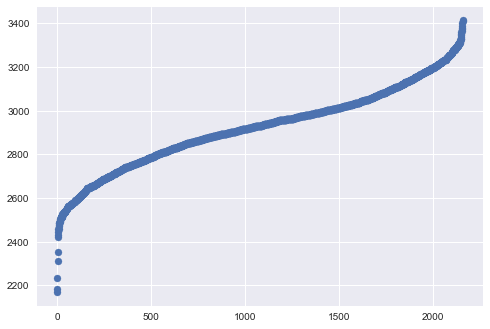

CoverType3 - mean elevation: 2398.4231481481484 / std: 194.10814713683976


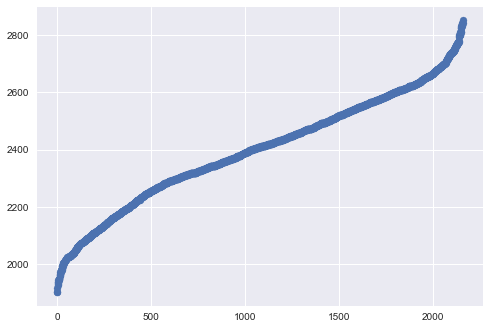

CoverType4 - mean elevation: 2223.42037037037 / std: 102.9299403863196


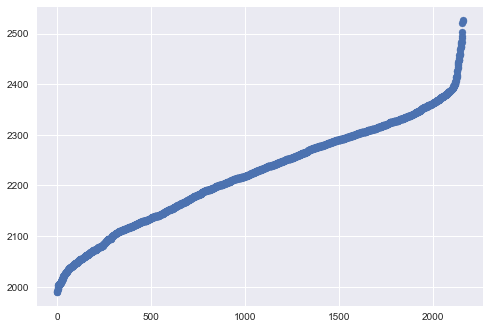

CoverType5 - mean elevation: 2786.801388888889 / std: 96.17746882654535


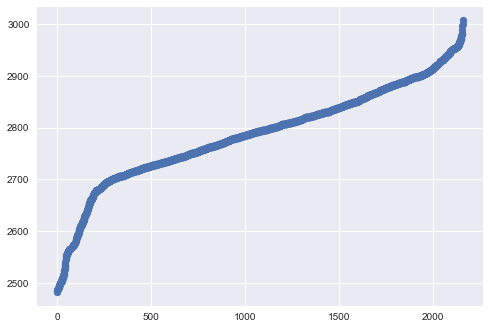

In [141]:
for covertype in range(1,6):
    print('CoverType'+str(covertype)+\
          ' - mean elevation:', train_df[train_df.Cover_Type==covertype]['Elevation'].mean(),\
          '/ std:', train_df[train_df.Cover_Type==covertype]['Elevation'].std())
    
    plt.scatter(range(len(train_df[train_df.Cover_Type==covertype]['Elevation'])),
                train_df[train_df.Cover_Type==covertype]['Elevation'].sort_values())
    plt.show()

### Elevation
* 5개의 유의미한 범위를 기준으로 5개의 카테고리컬 변수로 변환 가능할 것으로 보임.

In [142]:
# 긱 CoverType에 대한 Elevation값의 최소/최대값
for covertype in range(1, 8):
    print(train_df[train_df.Cover_Type==covertype]['Elevation'].sort_values().iloc[0], \
          train_df[train_df.Cover_Type==covertype]['Elevation'].sort_values().iloc[-1])

2525 3675
2169 3413
1903 2850
1989 2526
2482 3007
1863 2883
2870 3849


### Aspect
* CoverType에 대한 변별력이 나타나지 않음

In [143]:
# 긱 CoverType에 대한 Aspect값의 최소/최대값
for covertype in range(1, 8):
    print(train_df[train_df.Cover_Type==covertype]['Aspect'].sort_values().iloc[0], \
          train_df[train_df.Cover_Type==covertype]['Aspect'].sort_values().iloc[-1])

0 359
0 359
0 360
0 359
0 359
0 360
0 359


### Slope
* CoverType에 대해 최대값에서 다소간의 변동이 존재

In [144]:
# 긱 CoverType에 대한 Slope값의 최소/최대값
for covertype in range(1, 8):
    print(train_df[train_df.Cover_Type==covertype]['Slope'].sort_values().iloc[0], \
          train_df[train_df.Cover_Type==covertype]['Slope'].sort_values().iloc[-1])

1 41
0 45
1 47
1 46
1 50
1 52
0 49


### Hillshade Index

In [145]:
# 긱 CoverType에 대한 Hillshade Index 최소/최대값
for covertype in range(1, 8):
    print(train_df[train_df.Cover_Type==covertype]['Hillshade_9am'].sort_values().iloc[0], \
          train_df[train_df.Cover_Type==covertype]['Hillshade_9am'].sort_values().iloc[-1], \
         train_df[train_df.Cover_Type==covertype]['Hillshade_9am'].mean())

86 254 211.69027777777777
83 254 214.04444444444445
58 254 201.65555555555557
127 254 227.96805555555557
130 254 223.36898148148148
0 254 193.56296296296296
97 254 216.63981481481483


In [146]:
# 긱 CoverType에 대한 Hillshade Index 최소/최대값
for covertype in range(1, 8):
    print(train_df[train_df.Cover_Type==covertype]['Hillshade_Noon'].sort_values().iloc[0], \
          train_df[train_df.Cover_Type==covertype]['Hillshade_Noon'].sort_values().iloc[-1], \
         train_df[train_df.Cover_Type==covertype]['Hillshade_Noon'].mean())

125 254 223.2486111111111
115 254 225.3699074074074
120 254 216.5611111111111
137 254 216.88981481481483
99 254 218.31712962962962
127 254 209.96064814814815
99 254 222.41203703703704


In [147]:
# 긱 CoverType에 대한 Hillshade Index 최소/최대값
for covertype in range(1, 8):
    print(train_df[train_df.Cover_Type==covertype]['Hillshade_3pm'].sort_values().iloc[0], \
          train_df[train_df.Cover_Type==covertype]['Hillshade_3pm'].sort_values().iloc[-1], \
         train_df[train_df.Cover_Type==covertype]['Hillshade_3pm'].mean())

0 246 144.06574074074075
6 248 142.95092592592593
0 248 141.54953703703703
0 230 111.8087962962963
0 229 121.39259259259259
22 238 147.6824074074074
0 226 136.19398148148147


### Soil_Type

In [148]:
soils_covers = []

for cover in range(1, 8):
    soils_cover = []
    for soil_num in range(1, 41):
        
        soiltype_by_covertype = train_df[train_df.Cover_Type==cover]['Soil_Type'+str(soil_num)].sum()
        #print('Soil_Type'+str(soil_num), soiltype_by_covertype)
        soils_cover.append(soiltype_by_covertype)
    soils_covers.append(soils_cover)
    
for i, cover in enumerate(soils_covers):
    print('CoverType =', i+1, end=' // including ')
    
    
    soils_by_covertype = []
    for i, soilcover in enumerate(cover):
        if soilcover:
            soils_by_covertype.append(i+1)
            
    
    print('{} types of soil'.format(len(soils_by_covertype)))
    print(soils_by_covertype)
    print('')

CoverType = 1 // including 25 types of soil
[4, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 35, 38, 39, 40]

CoverType = 2 // including 33 types of soil
[2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40]

CoverType = 3 // including 13 types of soil
[1, 2, 3, 4, 5, 6, 10, 11, 13, 14, 16, 17, 32]

CoverType = 4 // including 11 types of soil
[1, 2, 3, 4, 5, 6, 10, 11, 14, 16, 17]

CoverType = 5 // including 20 types of soil
[2, 4, 10, 11, 13, 16, 17, 18, 19, 20, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34]

CoverType = 6 // including 19 types of soil
[1, 2, 3, 4, 5, 6, 10, 11, 13, 14, 16, 17, 20, 23, 24, 31, 32, 33, 34]

CoverType = 7 // including 18 types of soil
[4, 21, 22, 23, 24, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]



### feature `Wilderness_Area` 
* 4 classes

In [149]:
# combining 4 binary columns for Wilderness_Area1 to Wilderness_Area4
train_df['Wilderness_Area'] =\
    train_df['Wilderness_Area1']+\
    train_df['Wilderness_Area2'].map({0:0, 1:2})+\
    train_df['Wilderness_Area3'].map({0:0, 1:3})+\
    train_df['Wilderness_Area4'].map({0:0, 1:4})

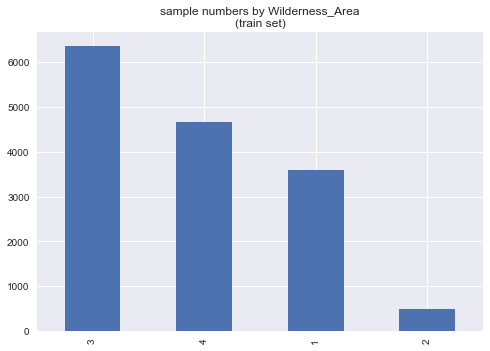

In [150]:
train_df.Wilderness_Area.value_counts().plot(kind='bar'); plt.title('sample numbers by Wilderness_Area\n(train set)'); plt.show()

# Conditional distribution graph
* 로그 변환으로 정규분포에 가깝게 변환한 뒤, 로그값 분포의 차이가 유의미한 경우
  * create_dist_prob_columns 함수를 이용하여 해당 feature의 로그값이 각 로그 분포에 속할 확률을 feature로 생성한다.

In [151]:
def apply_log_to_feature(df, featurename):
    if df[featurename].min() <= 0:
        df[featurename + '_log'] = np.log(df[featurename] - df[featurename].min() + .3)
    else:
        df[featurename + '_log'] = np.log(df[featurename])    

### Slope

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


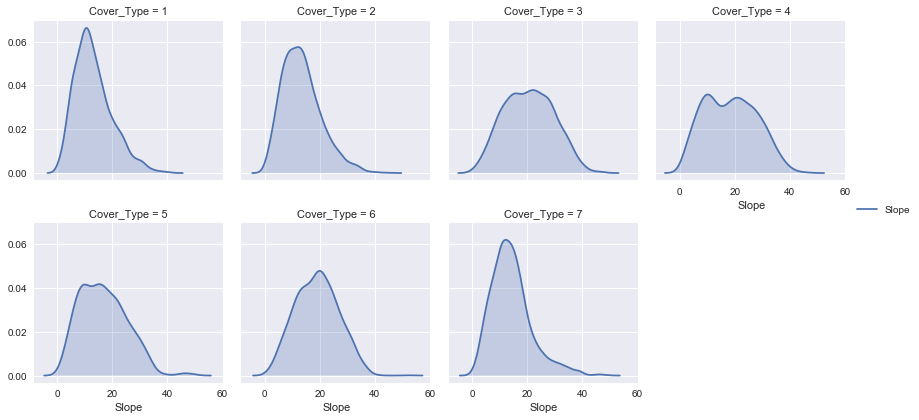

In [152]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Slope", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Slope + Wilderness_Area

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


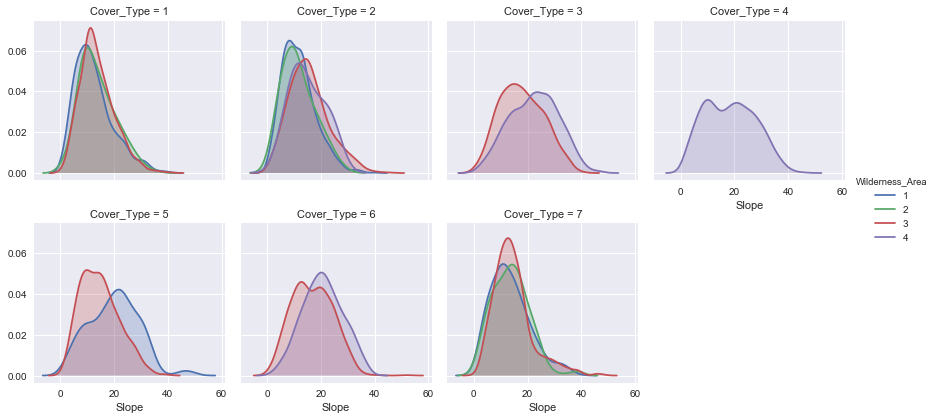

In [153]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Slope", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Slope_log
* Add `.3` to all values in `Slope` feature and caculate their log values
* We can see the distribution shape becomes closer to unimodal distribution after applying `log`

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


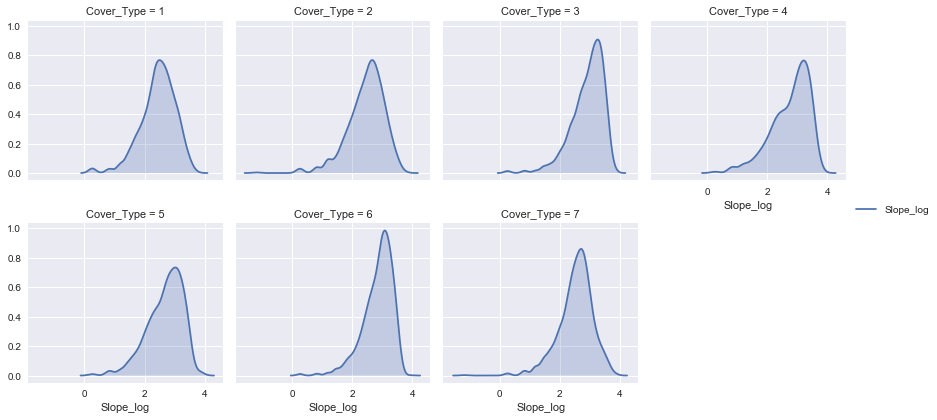

In [154]:
apply_log_to_feature(train_df, 'Slope')

g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Slope_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


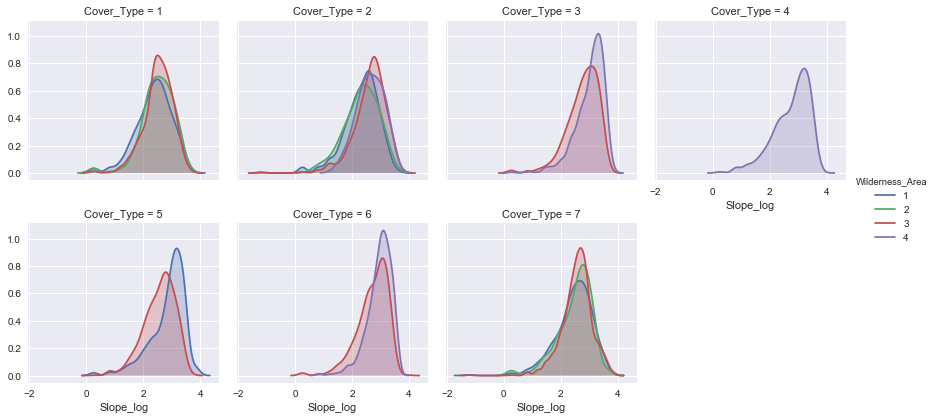

In [155]:
g = sns.FacetGrid(train_df, col="Cover_Type", hue='Wilderness_Area', size=3, col_wrap=4)
g.map(sns.kdeplot, "Slope_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Elevation

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


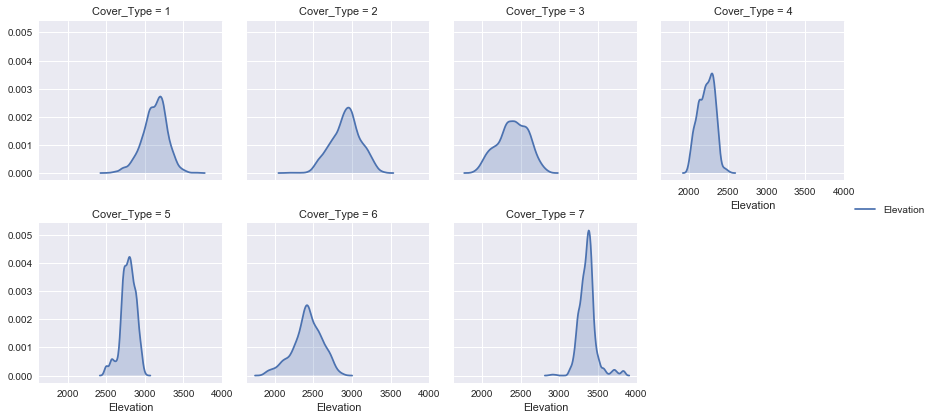

In [156]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Elevation", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Elevation + Wilderness_Area

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


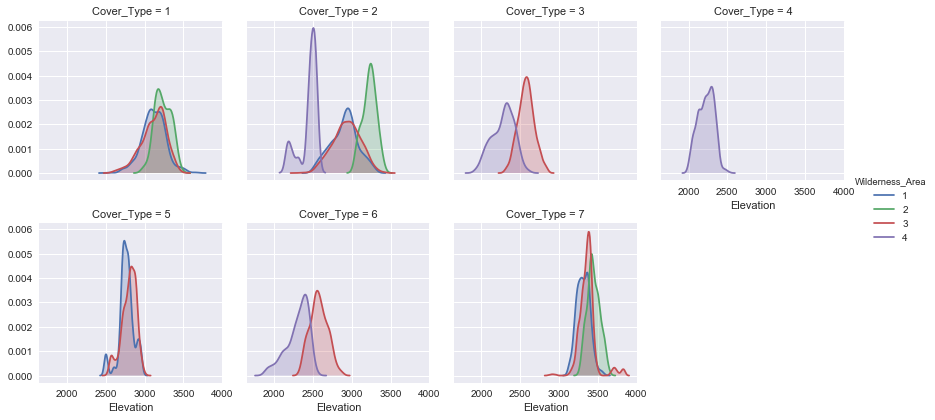

In [157]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area',col_wrap=4)
g.map(sns.kdeplot, "Elevation", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Applying `log` to `Elevation`

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


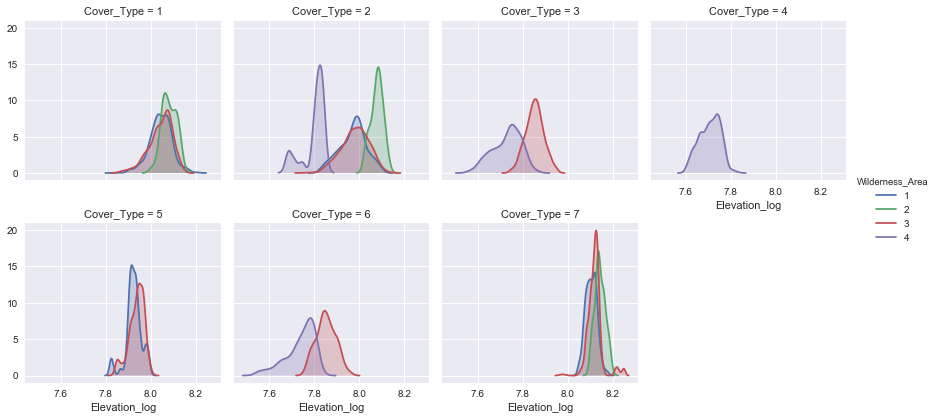

In [158]:
apply_log_to_feature(train_df, 'Elevation')

g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area',col_wrap=4)
g.map(sns.kdeplot, "Elevation_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Aspect

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


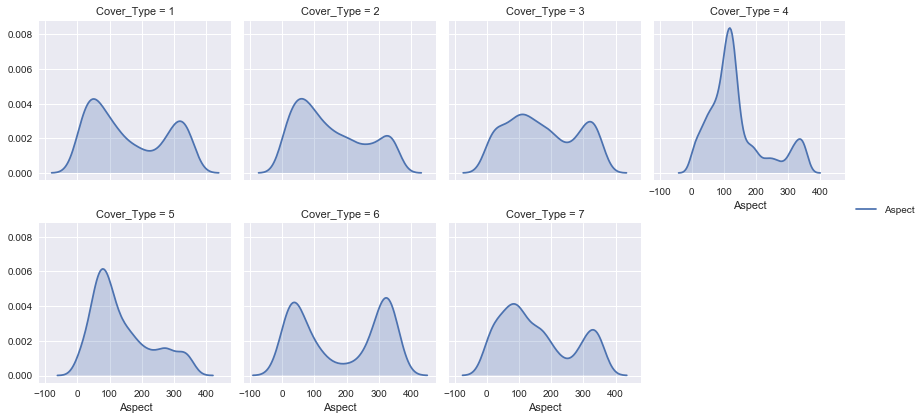

In [41]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Aspect", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


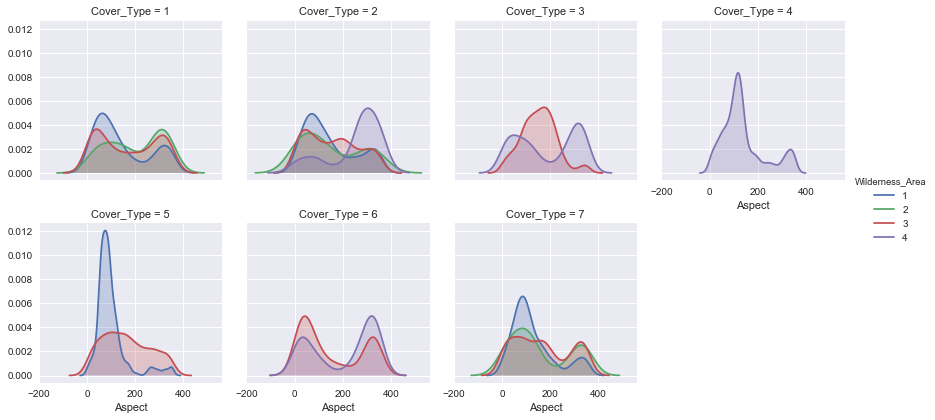

In [42]:
g = sns.FacetGrid(train_df, col="Cover_Type",hue='Wilderness_Area', size=3, col_wrap=4)
g.map(sns.kdeplot, "Aspect", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Applying `log` to `Aspect`

In [159]:
apply_log_to_feature(train_df, 'Aspect')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


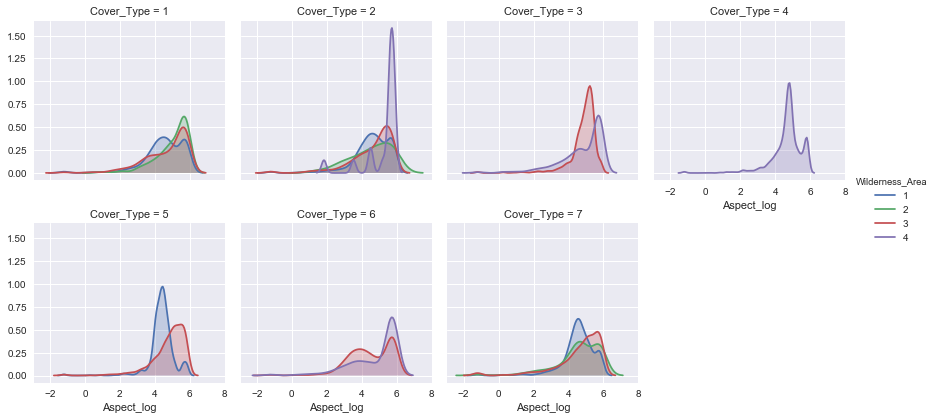

In [44]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3,hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Aspect_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Horizontal_Distance_To_Hydrology

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


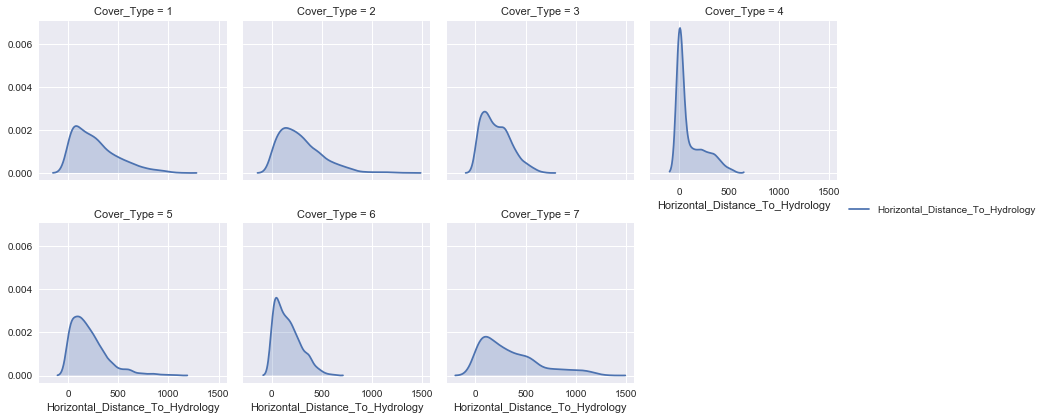

In [45]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Hydrology", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


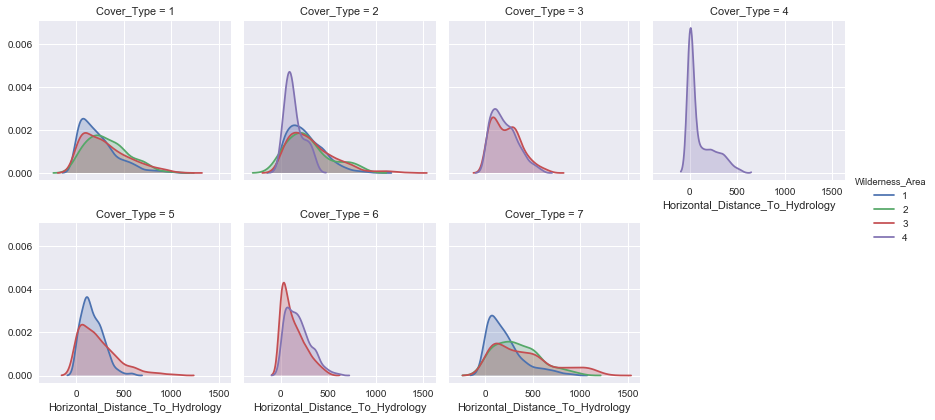

In [46]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Hydrology", shade=True).add_legend()
sns.despine(left=True)
plt.show()

In [160]:
apply_log_to_feature(train_df, 'Horizontal_Distance_To_Hydrology')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


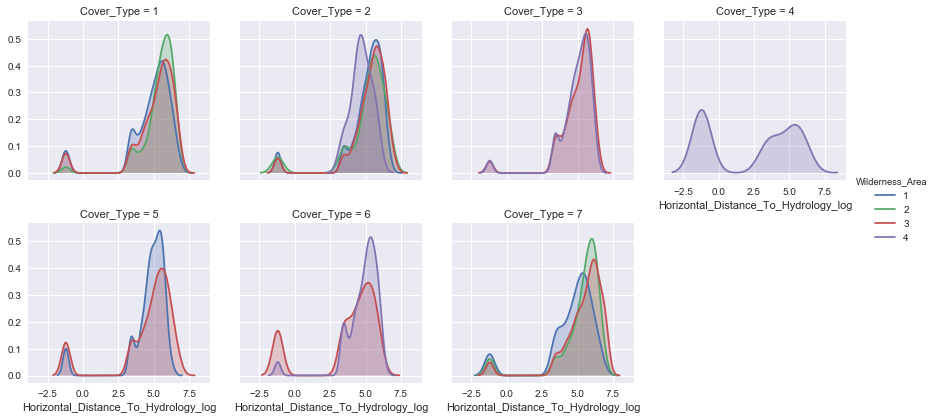

In [48]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Hydrology_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Vertical_Distance_To_Hydrology

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


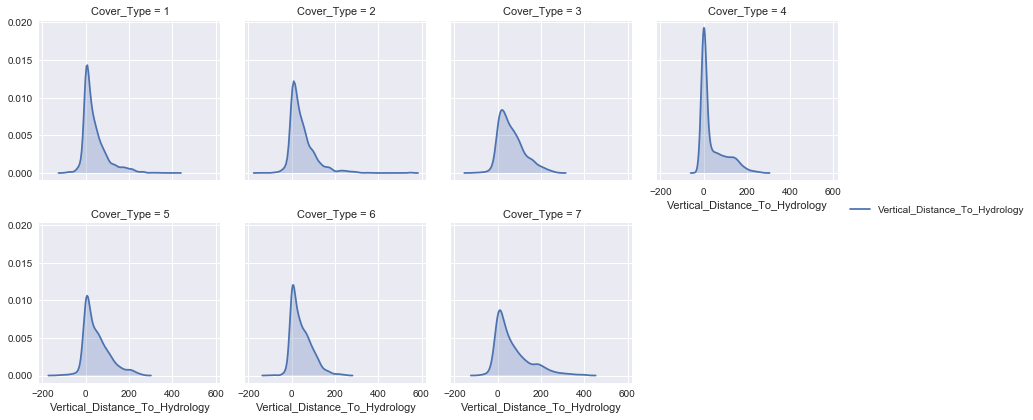

In [49]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Vertical_Distance_To_Hydrology", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


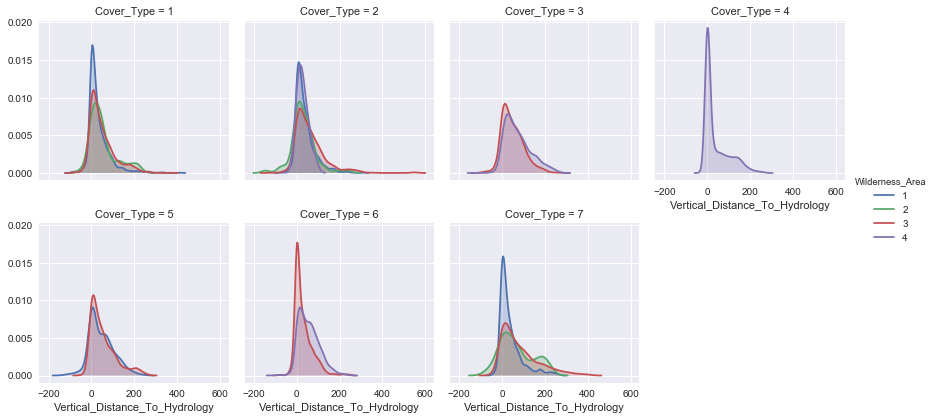

In [50]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Vertical_Distance_To_Hydrology", shade=True).add_legend()
sns.despine(left=True)
plt.show()

In [161]:
apply_log_to_feature(train_df, 'Vertical_Distance_To_Hydrology')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


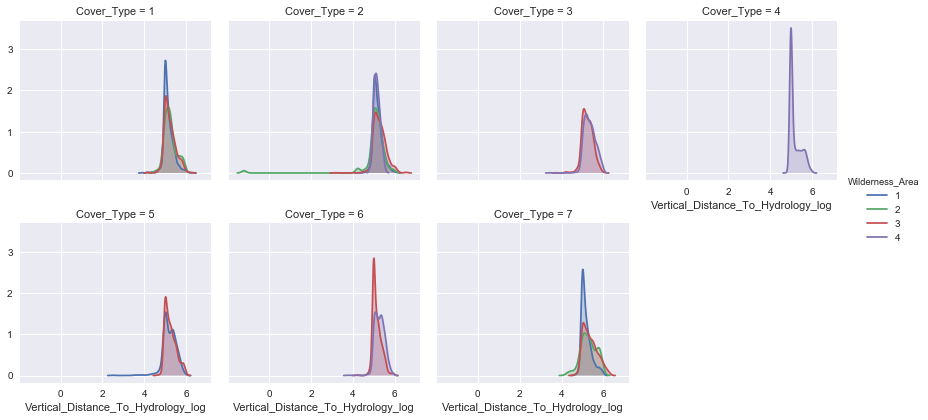

In [52]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Vertical_Distance_To_Hydrology_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Horizontal_Distance_To_Roadways

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


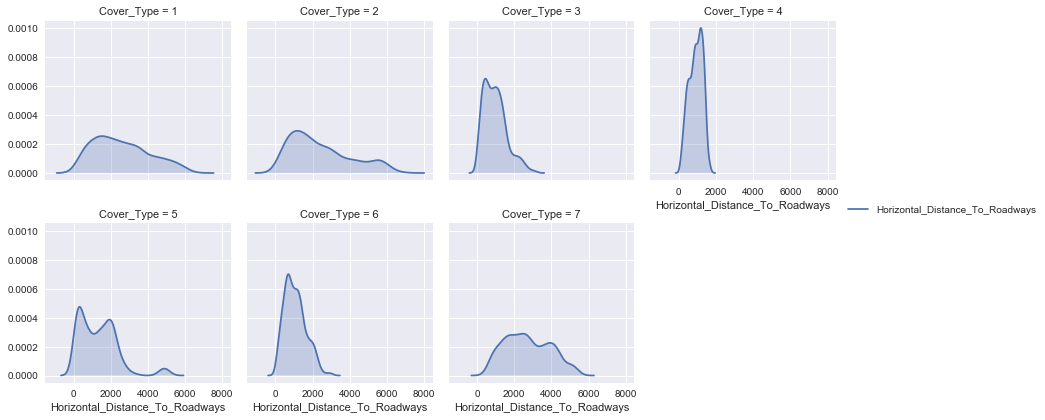

In [53]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Roadways", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


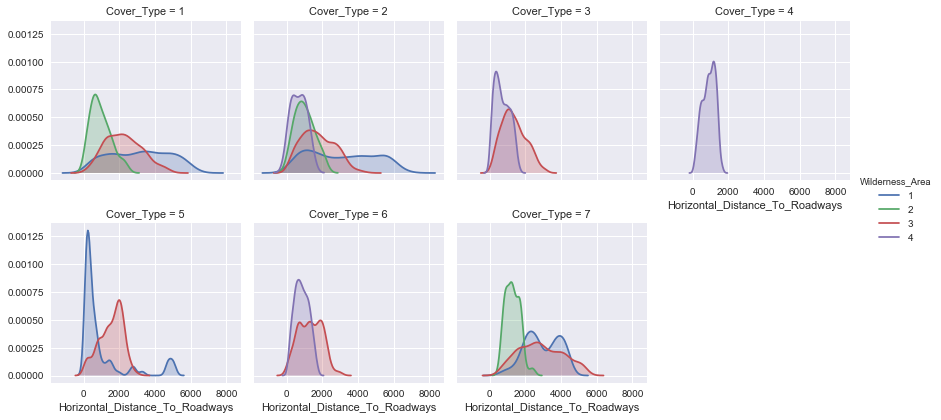

In [54]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Roadways", shade=True).add_legend()
sns.despine(left=True)
plt.show()

In [162]:
apply_log_to_feature(train_df, 'Horizontal_Distance_To_Roadways')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


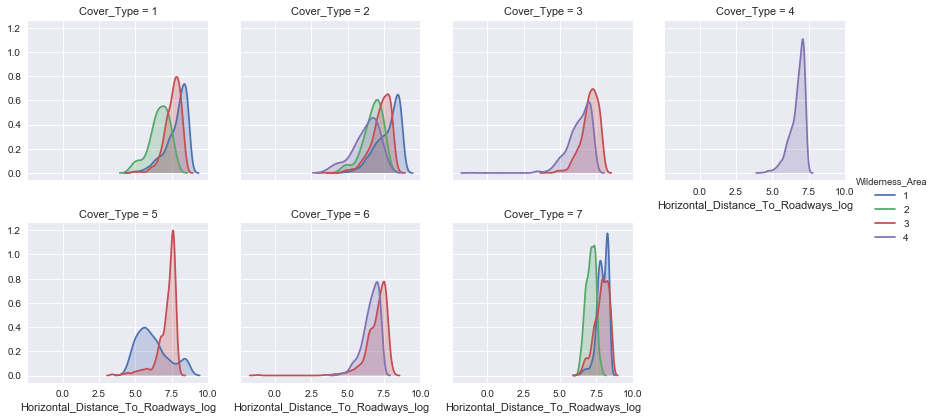

In [56]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Roadways_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Horizontal_Distance_To_Fire_Points

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


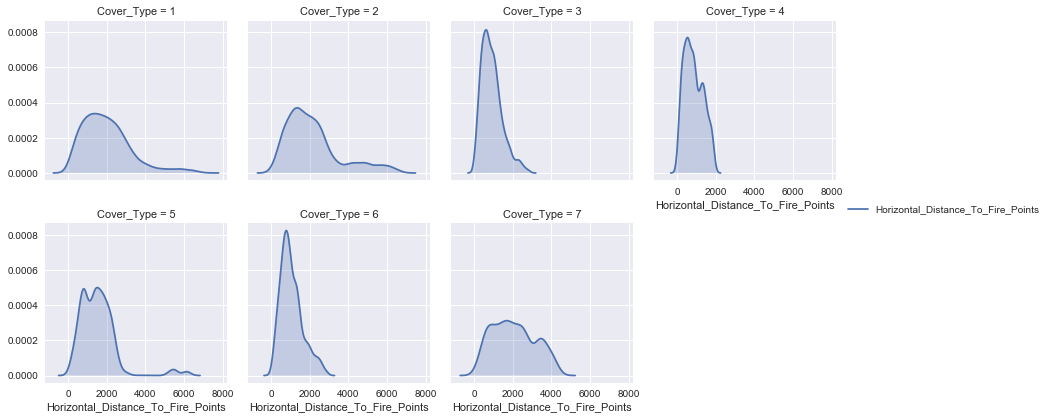

In [57]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Fire_Points", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


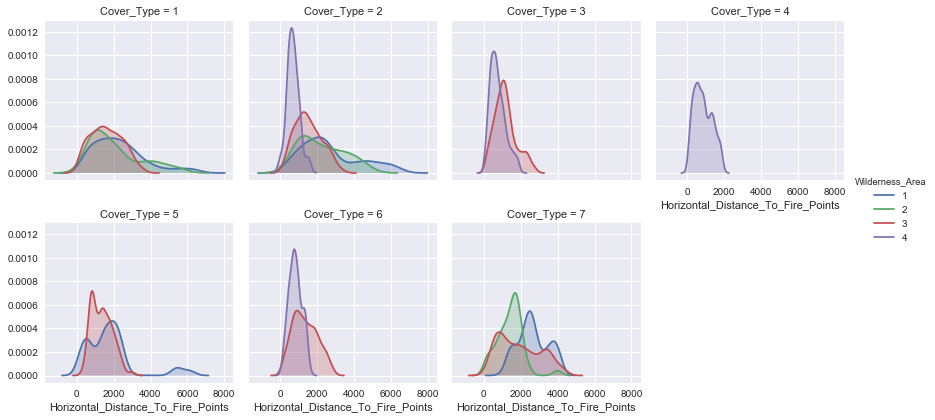

In [58]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Fire_Points", shade=True).add_legend()
sns.despine(left=True)
plt.show()

In [163]:
apply_log_to_feature(train_df, 'Horizontal_Distance_To_Fire_Points')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


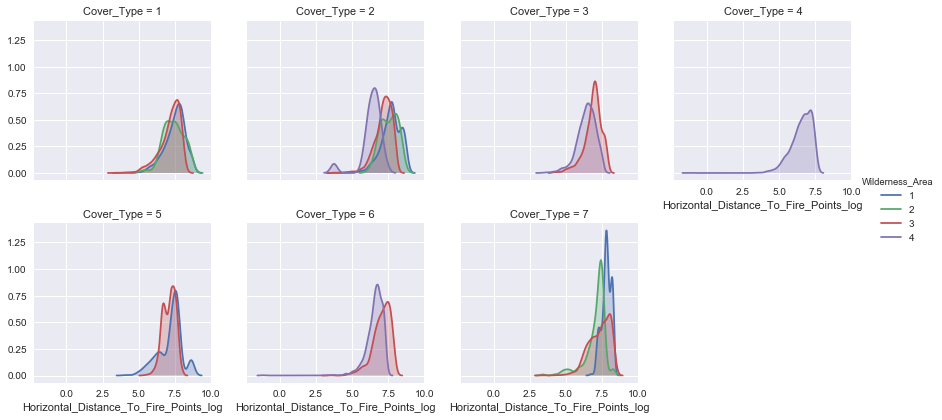

In [60]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Horizontal_Distance_To_Fire_Points_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Hillshade_9am

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


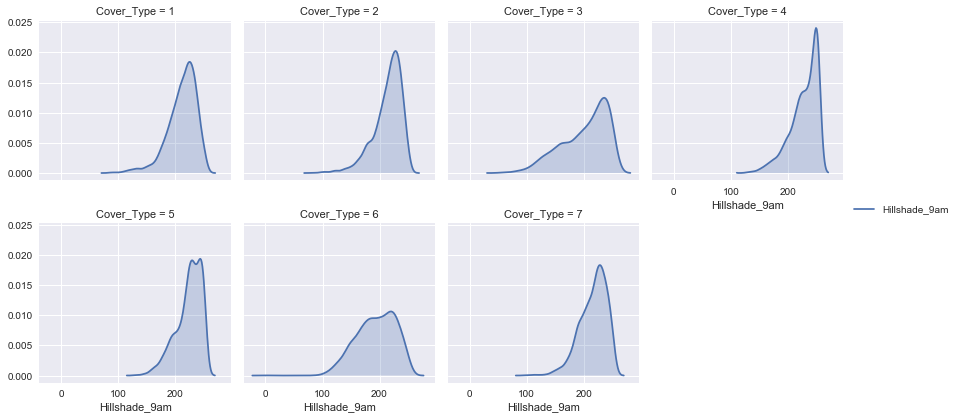

In [61]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Hillshade_9am", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


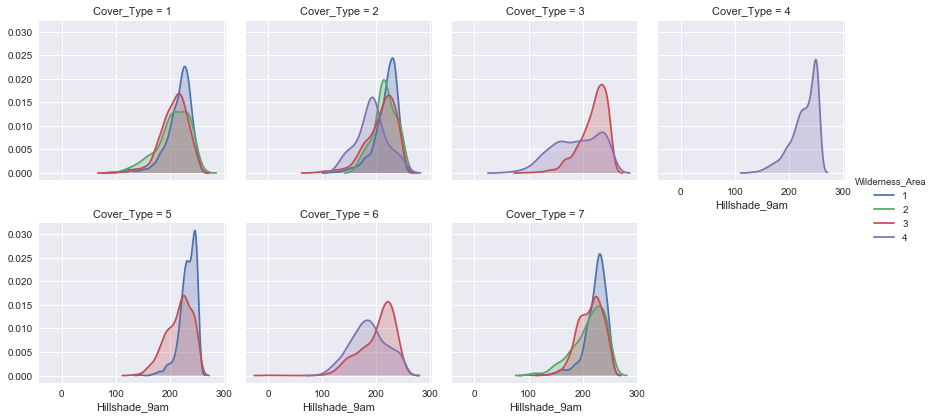

In [62]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Hillshade_9am", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


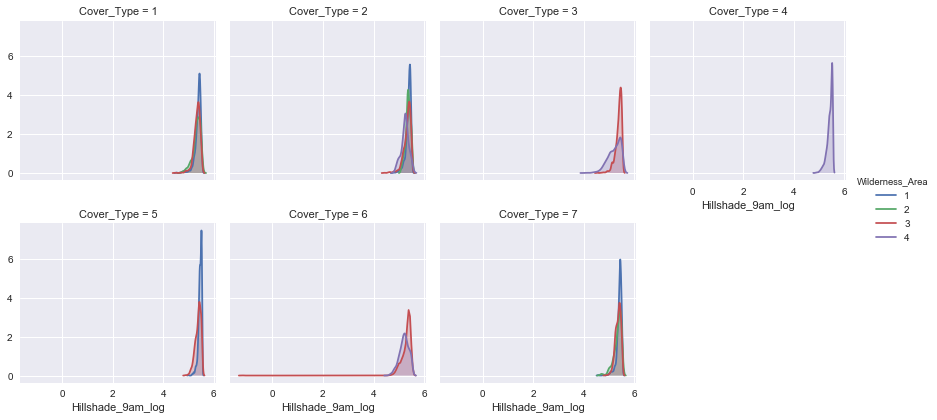

In [164]:
apply_log_to_feature(train_df, 'Hillshade_9am')

g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Hillshade_9am_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Hillshade_Noon

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


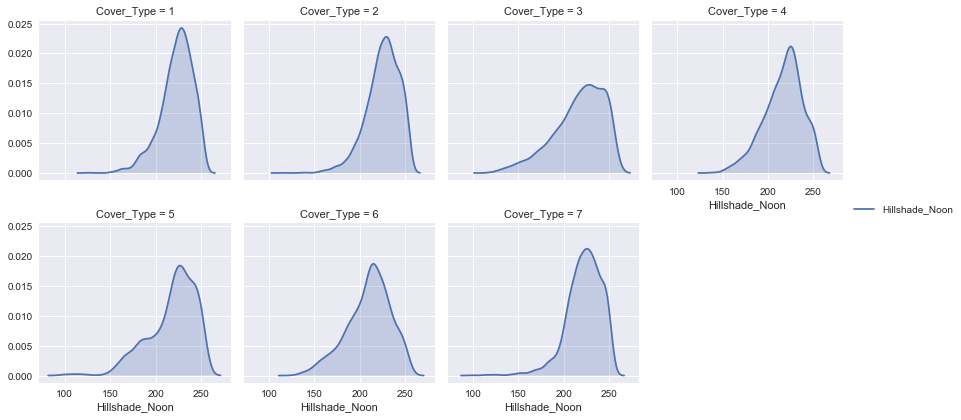

In [64]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Hillshade_Noon", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


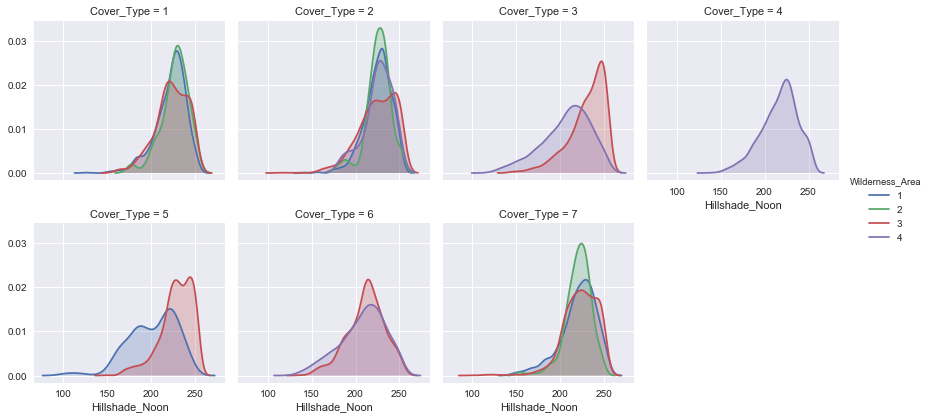

In [65]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Hillshade_Noon", shade=True).add_legend()
sns.despine(left=True)
plt.show()

In [165]:
apply_log_to_feature(train_df, 'Hillshade_Noon')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


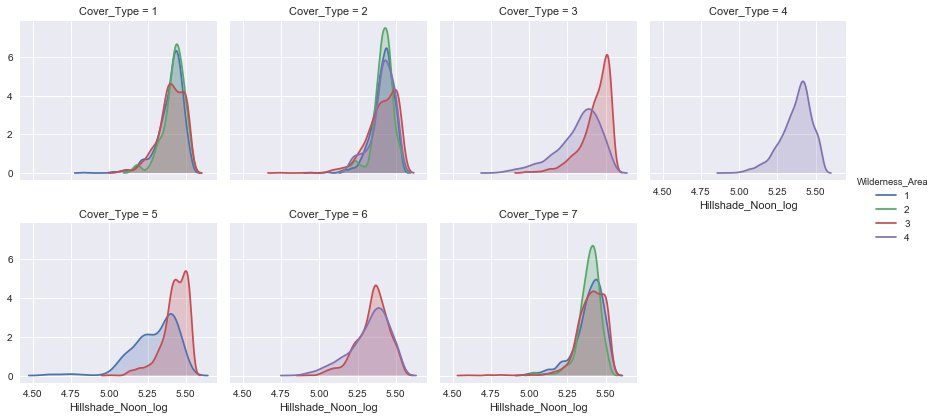

In [67]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Hillshade_Noon_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Hillshade_3pm

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


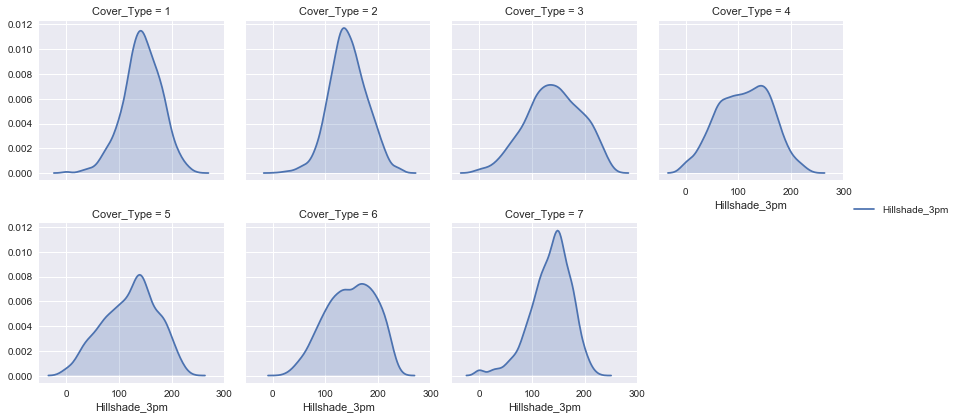

In [68]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, col_wrap=4)
g.map(sns.kdeplot, "Hillshade_3pm", shade=True).add_legend()
sns.despine(left=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


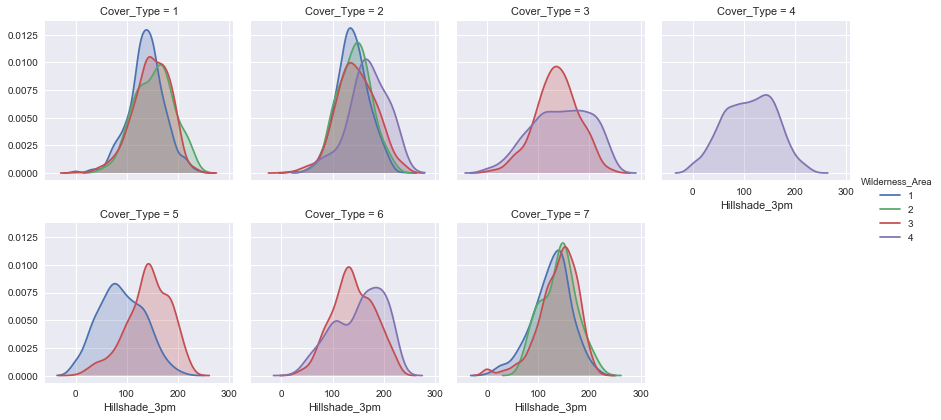

In [69]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Hillshade_3pm", shade=True).add_legend()
sns.despine(left=True)
plt.show()

In [166]:
apply_log_to_feature(train_df, 'Hillshade_3pm')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


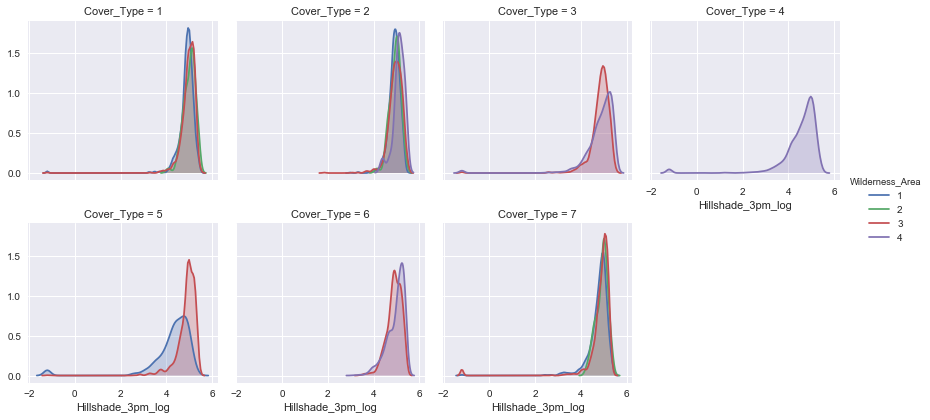

In [71]:
g = sns.FacetGrid(train_df, col="Cover_Type", size=3, hue='Wilderness_Area', col_wrap=4)
g.map(sns.kdeplot, "Hillshade_3pm_log", shade=True).add_legend()
sns.despine(left=True)
plt.show()

# Feature engineering
Focus on engineering distance continuous feature

* Elevation : unique 1665 / range [1863, 3849]
* Horizontal_Distance_To_Hydrology : unique 400 / range[0, 1343]
* Vertical_Distance_To_Hydrology : unique 423 / range[-146 ~ 554]
* Horizontal_Distance_To_Roadways : unique 3250 / range[0, 6890]
* Horizontal_Distance_To_Fire_Points : unique 2710 / range[0, 6993]

<br>

In [167]:
X = train_df.drop(['Cover_Type'], axis=1)
X['dataset'] = 0

X_t = test_df
X_t['dataset'] = 1
y_train = train_df.Cover_Type

In [168]:
X_t['Wilderness_Area'] =\
    X_t['Wilderness_Area1']+\
    X_t['Wilderness_Area2'].map({0:0, 1:2})+\
    X_t['Wilderness_Area3'].map({0:0, 1:3})+\
    X_t['Wilderness_Area4'].map({0:0, 1:4})

In [169]:
def create_dist_prob_columns_(Xdf, ydf, X_, target):
    
    apply_log_to_feature(Xdf, target)
    apply_log_to_feature(X_, target)
    
    # iterate over every unique target value
    for i in ydf.unique():
        elev_cover_idx = (ydf==i)

        elev_cover_mean = Xdf[target+'_log'][elev_cover_idx].mean()
        elev_cover_std = Xdf[target+'_log'][elev_cover_idx].std()
        
        Xdf[target+'_log_pdf_'+str(i)] = norm.pdf(Xdf[target+'_log'], elev_cover_mean, elev_cover_std)
        Xdf[target+'_log_cdf_'+str(i)] = norm.cdf(Xdf[target+'_log'], elev_cover_mean, elev_cover_std)
        X_[target+'_log_pdf_'+str(i)] = norm.pdf(X_[target+'_log'], elev_cover_mean, elev_cover_std)
        X_[target+'_log_cdf_'+str(i)] = norm.cdf(X_[target+'_log'], elev_cover_mean, elev_cover_std)
        
        for j in Xdf['Wilderness_Area'].unique():
            
            elev_wild_cover_idx = ((ydf==i) & (X_['Wilderness_Area']==j))

            elev_wild_cover_mean = Xdf[target+'_log'][elev_wild_cover_idx].mean()
            elev_wild_cover_std = Xdf[target+'_log'][elev_wild_cover_idx].std()
            
            
            Xdf[target+'_log_wild_pdf_'+str(i)+str(j)] = \
                                            norm.pdf(Xdf[target+'_log'], elev_wild_cover_mean, elev_wild_cover_std)
            Xdf[target+'_log_wild_cdf_'+str(i)+str(j)] = \
                                            norm.cdf(Xdf[target+'_log'], elev_wild_cover_mean, elev_wild_cover_std)
            X_[target+'_log_wild_pdf_'+str(i)+str(j)] = \
                                            norm.pdf(X_[target+'_log'], elev_wild_cover_mean, elev_wild_cover_std)
            X_[target+'_log_wild_cdf_'+str(i)+str(j)] = \
                                            norm.cdf(X_[target+'_log'], elev_wild_cover_mean, elev_wild_cover_std)
            
    Xdf.fillna(0, inplace=True)
    X_.fillna(0, inplace=True)

In [170]:
create_dist_prob_columns_(X, y_train, X_t, 'Slope')
create_dist_prob_columns_(X, y_train, X_t, 'Elevation')
create_dist_prob_columns_(X, y_train, X_t, 'Aspect')

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1653: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1654: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x) & (scale > 0)
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1736: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\Administrator\Anaconda3\lib\site-

In [171]:
X = pd.concat([X, X_t], axis=0)
X.shape

(581012, 277)

### Meaning of 'Aspect'
The compass direction that the slope faces is your slope aspect.
![](http://gisgeography.com/wp-content/uploads/2016/06/Aspect-Legend.png)


In [172]:
def aspect_map(x):
    # north = 1, northeast = 2, east = 3, southeast = 4, south = 5, southwest = 6, west = 7, northwest = 8
    
    if (0+0.3 <= x < 22.5+0.3) or (337.5+0.3 <= x <= 360+0.3): return 1;
    elif (22.5+0.3 <= x < 67.5+0.3): return 2;
    elif (67.5+0.3 <= x < 112.5+0.3): return 3;
    elif (112.5+0.3 <= x < 157.5+0.3): return 4;
    elif (157.5+0.3 <= x < 202.5+0.3): return 5;
    elif (202.5+0.3 <= x < 247.5+0.3): return 6;
    elif (247.5+0.3 <= x < 292.5+0.3): return 7;
    else: return 8;

In [173]:
X['Slope_Direction'] = X['Aspect'].apply(aspect_map)

In [174]:
# slope direction into dummies (one-hot-encoding)
X = pd.concat([X, pd.get_dummies(X.Slope_Direction, prefix='Slope_Direction')], axis=1)

## Generate Features by Feature Boundaries 
## corresponding to CoverType(`from 1 to 7`)
* Elevation
  * Elevation_Cover{1-7}
* Slope
  * Slope_Cover{1-7}
* Asepct
  * Aspect_Cover{1-7}
* Hillshade_9am
  * Hillshade_9am_Cover{1-7}
* Hillshade_Noon
  * Hillshade_Noon_Cover{1-7}
* Hillshade_3pm
  * Hillshade_3pm_Cover{1-7}

### Soil_Type Coverage
* example
  * `Soils_Cover1` => is the sample's soil type in the soil coverage of CoverType1?
  * `Soils_Cover2` => is the sample's soil type in the soil coverage of CoverType2?
  * ...

In [175]:
import re
soiltype_cols = re.findall(r'Soil_Type[0-9]+',' '.join(X.columns))

In [176]:
# combine all binary columns representing each soiltype into one columna
X['Soil_Type'] = X[soiltype_cols].idxmax(axis=1).apply(lambda x: int(x[9:]))

In [177]:
soils_by_covertypes = []

for i, cover in enumerate(soils_covers):
    soils_by_covertype = []
    
    for i, soilcover in enumerate(cover):
        if soilcover:
            soils_by_covertype.append(i+1)
            
    soils_by_covertypes.append(soils_by_covertype)

In [178]:
for i in range(1, 8):
    covertype = i

    def soil_type_coverage_map(x, covertype = covertype):

        soils = soils_by_covertypes[covertype-1]

        if x in soils:
            return 1
        else:
            return 0
        
    X['Soils_Cover'+str(i)] = X['Soil_Type'].map(soil_type_coverage_map)

### Elevation Coverage

In [179]:
elevations_by_covertypes = [(train_df[train_df['Cover_Type']==covertype]['Elevation'].min(), 
                             train_df[train_df['Cover_Type']==covertype]['Elevation'].max())
                             for covertype in range(1, 8)]

In [180]:
elevations_by_covertypes

[(2525, 3675),
 (2169, 3413),
 (1903, 2850),
 (1989, 2526),
 (2482, 3007),
 (1863, 2883),
 (2870, 3849)]

In [181]:
for i in range(1, 8):
    covertype = i

    def elevation_coverage_map(x, covertype = covertype):

        min_, max_ = elevations_by_covertypes[covertype-1]

        if min_ < x < max_:
            return 1
        else:
            return 0
        
    X['Elevation_Cover'+str(i)] = X['Elevation'].map(elevation_coverage_map)

### Slope Coverage

In [182]:
slopes_by_covertypes = [(train_df[train_df['Cover_Type']==covertype]['Slope'].min(), 
                             train_df[train_df['Cover_Type']==covertype]['Slope'].max())
                             for covertype in range(1, 8)]

In [183]:
slopes_by_covertypes

[(1, 41), (0, 45), (1, 47), (1, 46), (1, 50), (1, 52), (0, 49)]

In [184]:
for i in range(1, 8):
    covertype = i

    def slope_coverage_map(x, covertype = covertype):

        min_, max_ = slopes_by_covertypes[covertype-1]

        if min_ < x < max_:
            return 1
        else:
            return 0
        
    X['Slope_Cover'+str(i)] = X['Slope'].map(slope_coverage_map)

### Hillshade_(9am, Noon, 3pm) Coverage

In [185]:
shades_by_covertypes_list = []
for shadetime in ['9am', 'Noon', '3pm']:
    shades_by_covertypes = [(train_df[train_df['Cover_Type']==covertype]['Hillshade_'+shadetime].min(), 
                             train_df[train_df['Cover_Type']==covertype]['Hillshade_'+shadetime].max())
                             for covertype in range(1, 8)]

    shades_by_covertypes_list.append(shades_by_covertypes)

In [186]:
shades_by_covertypes_list[0]

[(86, 254), (83, 254), (58, 254), (127, 254), (130, 254), (0, 254), (97, 254)]

In [187]:
shades_by_covertypes_list[1]

[(125, 254),
 (115, 254),
 (120, 254),
 (137, 254),
 (99, 254),
 (127, 254),
 (99, 254)]

In [188]:
shades_by_covertypes_list[2]

[(0, 246), (6, 248), (0, 248), (0, 230), (0, 229), (22, 238), (0, 226)]

In [189]:
for j, time in enumerate(['9am', 'Noon', '3pm']):
    shades_by_covertypes = shades_by_covertypes_list[j]
    
    for i in range(1, 8):
        covertype = i

        def hillshade_coverage_map(x, covertype = covertype):
            min_, max_ = shades_by_covertypes[covertype-1]
            if min_ < x < max_:
                return 1
            else:
                return 0

        X['Hillshade_'+time+'_Cover'+str(i)] = X['Hillshade_'+time].map(hillshade_coverage_map)

### Random Feature Generation
* Using fuction

In [190]:
def generate_column(df, colname, how=None):
    if how == 'sqrd':
        df[colname+'_sqrd'] = df[colname]**2
    elif how == 'cube':
        df[colname+'_cube'] = df[colname]**3

In [191]:
train_df.columns[1:11]

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [192]:
cols_to_generate = train_df.columns[1:11]

for col2gen in cols_to_generate:
    generate_column(X, col2gen, how='sqrd')
    generate_column(X, col2gen, how='cube')

### Random Feature Generation
* manually

In [193]:
X['Diagnoal_Distance_To_Hydrology'] = (X['Vertical_Distance_To_Hydrology']**2+\
                                     X['Horizontal_Distance_To_Hydrology']**2)**(1/2)
X['Vertical_Distance_Sum_EH'] = X.Elevation + X.Vertical_Distance_To_Hydrology
X['Vertical_Distance_Diff_EH'] = X.Elevation - X.Vertical_Distance_To_Hydrology

X['Vertical_Distance_Div_EH'] = X.Vertical_Distance_To_Hydrology / X.Elevation
X['Vertical_Distance_Mult_EH'] = X.Elevation * X.Vertical_Distance_To_Hydrology
X['Binary_Distance_To_Hydrology'] = X['Vertical_Distance_To_Hydrology'].apply(lambda x: 0 if x < 0 else 1)

In [194]:
X['Horizontal_Distance_Sum_HRF'] = X.Horizontal_Distance_To_Hydrology + X.Horizontal_Distance_To_Roadways + X.Horizontal_Distance_To_Fire_Points
X['Horizontal_Distance_Sum_HR'] = X.Horizontal_Distance_To_Hydrology + X.Horizontal_Distance_To_Roadways
X['Horizontal_Distance_Sum_HF'] = X.Horizontal_Distance_To_Hydrology + X.Horizontal_Distance_To_Fire_Points
X['Horizontal_Distance_Sum_RF'] = X.Horizontal_Distance_To_Roadways + X.Horizontal_Distance_To_Fire_Points

In [195]:
X['Horizontal_Distance_Diff_HRF'] = X.Horizontal_Distance_To_Hydrology - X.Horizontal_Distance_To_Roadways - X.Horizontal_Distance_To_Fire_Points
X['Horizontal_Distance_Diff_HR'] = (X.Horizontal_Distance_To_Hydrology - X.Horizontal_Distance_To_Roadways)
X['Horizontal_Distance_Diff_HF'] = (X.Horizontal_Distance_To_Hydrology - X.Horizontal_Distance_To_Fire_Points)
X['Horizontal_Distance_Diff_RF'] = (X.Horizontal_Distance_To_Roadways - X.Horizontal_Distance_To_Fire_Points)

In [196]:
X['Horizontal_Distance_Mult_HRF'] = X.Horizontal_Distance_To_Hydrology * X.Horizontal_Distance_To_Roadways * X.Horizontal_Distance_To_Fire_Points
X['Horizontal_Distance_Mult_HR'] = X.Horizontal_Distance_To_Hydrology * X.Horizontal_Distance_To_Roadways
X['Horizontal_Distance_Mult_HF'] = X.Horizontal_Distance_To_Hydrology * X.Horizontal_Distance_To_Fire_Points
X['Horizontal_Distance_Mult_RF'] = X.Horizontal_Distance_To_Roadways * X.Horizontal_Distance_To_Fire_Points

In [197]:
print(len(X['Hillshade_9am'][X['Hillshade_9am']==0]))
print(len(X['Hillshade_Noon'][X['Hillshade_Noon']==0]))
print(len(X['Hillshade_3pm'][X['Hillshade_3pm']==0]))

13
5
1338


* Add 1 to 3 of `Hillshade_` columns to avoid encountering `inf` while generating new features

In [198]:
X['Hillshade_9am'] += 1; X['Hillshade_Noon'] += 1; X['Hillshade_3pm'] += 1

In [199]:
X['Hillshade_Sum'] = X['Hillshade_3pm'] + X['Hillshade_9am'] + X['Hillshade_Noon']
X['Hillshade_Sum_0912'] = X['Hillshade_Noon'] + X['Hillshade_9am']
X['Hillshade_Sum_1215'] = X['Hillshade_3pm'] + X['Hillshade_Noon']
X['Hillshade_Sum_0915'] = X['Hillshade_3pm'] + X['Hillshade_9am']

X['Hillshade_Diff'] = X['Hillshade_3pm'] - X['Hillshade_9am'] - X['Hillshade_Noon']
X['Hillshade_Diff_0912'] = X['Hillshade_Noon'] - X['Hillshade_9am']
X['Hillshade_Diff_1215'] = X['Hillshade_3pm'] - X['Hillshade_Noon']
X['Hillshade_Diff_0915'] = X['Hillshade_3pm'] - X['Hillshade_9am']

X['Hillshade_Mult_091215'] = X['Hillshade_3pm'] * X['Hillshade_Noon'] * X['Hillshade_9am']
X['Hillshade_Mult_0912'] = X['Hillshade_Noon'] * X['Hillshade_9am']
X['Hillshade_Mult_1215'] = X['Hillshade_3pm'] * X['Hillshade_Noon']
X['Hillshade_Mult_0915'] = X['Hillshade_3pm'] * X['Hillshade_9am']

X['Hillshade_ratio_091215'] = X['Hillshade_3pm'] / X['Hillshade_Noon'] / X['Hillshade_9am']
X['Hillshade_ratio_0912'] = X['Hillshade_Noon'] / X['Hillshade_9am']
X['Hillshade_ratio_1215'] = X['Hillshade_3pm'] / X['Hillshade_Noon']
X['Hillshade_ratio_0915'] = X['Hillshade_3pm'] / X['Hillshade_9am']

In [200]:
import math
X['Radians_To_Hydrology'] = list(map(math.atan2,X['Vertical_Distance_To_Hydrology'],\
                                     X['Horizontal_Distance_To_Hydrology']))

In [201]:
manually_gen_cols = X.columns.tolist()[-35:]

In [202]:
for mgcol in manually_gen_cols:
    
    generate_column(X, mgcol, how='sqrd')
    generate_column(X, mgcol, how='cube')

In [203]:
X_train = X[X.dataset==0].drop(['Id','dataset'], axis=1); #X_train.to_csv('X_train_notscaled.csv', sep=',')
X_test = X[X.dataset==1].drop(['Id', 'dataset'], axis=1); #X_test.to_csv('X_test_notscaled.csv', sep=',')

In [204]:
len(X.columns)

454

### Check `null` counts

In [205]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Series([], dtype: int64)

In [206]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

Hillshade_3pm_log                         565892
Hillshade_9am_log                         565892
Hillshade_Noon_log                        565892
Horizontal_Distance_To_Fire_Points_log    565892
Horizontal_Distance_To_Hydrology_log      565892
Horizontal_Distance_To_Roadways_log       565892
Vertical_Distance_To_Hydrology_log        565892
dtype: int64

In [207]:
apply_log_to_feature(X_test, 'Hillshade_3pm')
apply_log_to_feature(X_test, 'Hillshade_9am')
apply_log_to_feature(X_test, 'Hillshade_Noon')
apply_log_to_feature(X_test, 'Horizontal_Distance_To_Fire_Points')
apply_log_to_feature(X_test, 'Horizontal_Distance_To_Hydrology')
apply_log_to_feature(X_test, 'Horizontal_Distance_To_Roadways')
apply_log_to_feature(X_test, 'Vertical_Distance_To_Hydrology')

In [208]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

Series([], dtype: int64)

## Scaling
* For the case using `XGBoost`

In [209]:
std_sc = StandardScaler()
X_scaled_train = std_sc.fit_transform(X_train)
X_scaled_test = std_sc.transform(X_test)

In [210]:
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_train.columns, index=range(X_train.shape[0]))
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns, index=range(X_test.shape[0]))

* Export dataframe as `csv` files to continue the project in the following notebook
  * We will exclude columns with only 1 unique value

In [211]:
X_scaled_train['trainset'] = np.ones(len(X_scaled_train))
X_scaled_test['trainset'] = np.zeros(len(X_scaled_test))
X = pd.concat([X_scaled_train, X_scaled_test], axis=0)

In [212]:
#X_num_unique_by_col = X.nunique()
#X_one_unique_col = X_num_unique_by_col[X_num_unique_by_col == 1]
#X_one_unique_colnames = X_one_unique_col.index.tolist()

X_one_unique_colnames = []
for col in X.columns:
    if len(X[col].unique()) == 1:
        X_one_unique_colnames.append(col)

In [213]:
len(X_one_unique_colnames)

126

In [214]:
X = X.drop(X_one_unique_colnames, axis=1)

In [215]:
len(X.columns)

327

In [218]:
for col in X.columns:
    print(col, len(X[col].unique()))

Aspect 361
Aspect_log 361
Aspect_log_cdf_1 361
Aspect_log_cdf_2 361
Aspect_log_cdf_3 361
Aspect_log_cdf_4 361
Aspect_log_cdf_5 361
Aspect_log_cdf_6 361
Aspect_log_cdf_7 361
Aspect_log_pdf_1 361
Aspect_log_pdf_2 361
Aspect_log_pdf_3 361
Aspect_log_pdf_4 361
Aspect_log_pdf_5 361
Aspect_log_pdf_6 361
Aspect_log_pdf_7 361
Aspect_log_wild_cdf_11 361
Aspect_log_wild_cdf_21 361
Aspect_log_wild_cdf_31 361
Aspect_log_wild_cdf_41 361
Aspect_log_wild_cdf_51 361
Aspect_log_wild_cdf_61 361
Aspect_log_wild_cdf_71 361
Aspect_log_wild_pdf_11 361
Aspect_log_wild_pdf_21 361
Aspect_log_wild_pdf_31 361
Aspect_log_wild_pdf_41 361
Aspect_log_wild_pdf_51 361
Aspect_log_wild_pdf_61 361
Aspect_log_wild_pdf_71 361
Elevation 1978
Elevation_log 1978
Elevation_log_cdf_1 1775
Elevation_log_cdf_2 1978
Elevation_log_cdf_3 1978
Elevation_log_cdf_4 1353
Elevation_log_cdf_5 1572
Elevation_log_cdf_6 1978
Elevation_log_cdf_7 1267
Elevation_log_pdf_1 1811
Elevation_log_pdf_2 1978
Elevation_log_pdf_3 1978
Elevation_log_pdf_

In [220]:
X_scaled_train = X[X['trainset']==1].drop(['trainset'], axis=1)
X_scaled_test = X[X['trainset']==0].drop(['trainset'], axis=1)

In [221]:
X_scaled_train.to_csv('data/X_scaled_train.csv', sep=',', index=False)

In [222]:
X_scaled_test.to_csv('data/X_scaled_test.csv', sep=',', index=False)